# Magnetic field caused by dipole and uniformly magnetized box

In [1]:
import sys
import os.path

sys.path.append(os.path.abspath(os.path.pardir))

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from src.mmag.unit_cell.fields import field_dipole
from src.mmag.unit_cell.fields import field_rectangular_box
from utils import RotationMatrix

## Uniformly magnetized in Z direction

We will study the comparision between a dipole and a uniformly magnetized box in the Z direction. We will plot the field at several points by rotating an initial vector (1,0,0) along the Z direction therefore we will measure the field at a circle in the x-y plane with modulus 1. 

In [42]:
# position of the dipole
p = np.array([0.0, 0.0, 0.0], dtype=np.float64)

# starting observation point of the field
ro = np.array([1.0, 0.0, 0.0], dtype=np.float64)

# direction of the dipole
m = np.array([0.0, 0.0, 1.0], dtype=np.float64)

# rotation axis along Z direction
axis=np.array([0.0, 0.0, 1.0], dtype=np.float64)
#axis=np.array([1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0)], dtype=np.float64)

# angles from 0 to 2.0*pi
angles = np.linspace(0.0, 2.0*np.pi, 200)

# rotating the observation point
r = [RotationMatrix(angle, axis).dot(ro) for angle in angles]

In [43]:
# calculating field
d_field = [field_dipole(p, m, robs) for robs in r]
d_field_modulus = [np.sqrt(f.dot(f)) for f in d_field ]

# box field calculation, d is the width of the box in the 3 dims.
d = np.array([1.0, 1.0, 1.0], dtype=np.float64)
b_field = [field_rectangular_box(p, d,  m, robs) for robs in r]
b_field_modulus = [np.sqrt(f.dot(f)) for f in b_field ]

<Figure size 432x288 with 0 Axes>

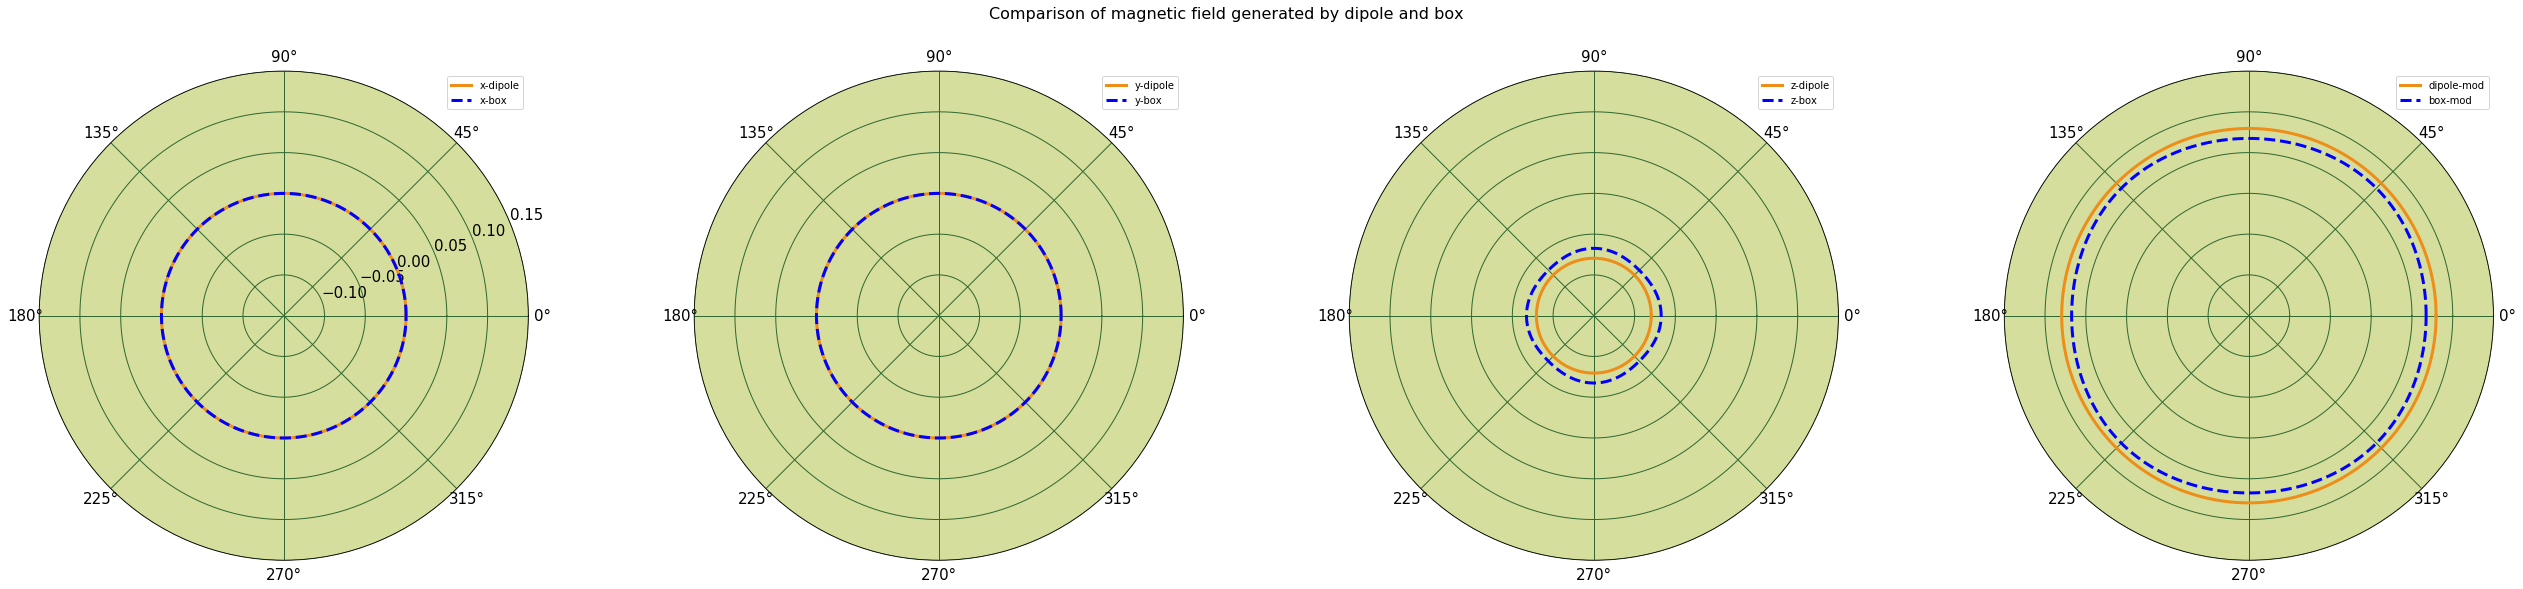

In [44]:
plt.clf()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(45,9), subplot_kw=dict(projection='polar', facecolor='#d5de9c'))

plt.suptitle("Comparison of magnetic field generated by dipole and box", size=16)

plt.ylim(-0.15,0.15)

ax1.plot(angles, [f[0] for f in d_field], color='#ee8d18', lw=3, label='x-dipole')
ax1.plot(angles, [f[0] for f in b_field], color='blue', ls='--', lw=3, label='x-box')
ax1.legend()

ax2.plot(angles, [f[1] for f in d_field], color='#ee8d18', lw=3, label='y-dipole')
ax2.plot(angles, [f[1] for f in b_field], color='blue', ls='--', lw=3, label='y-box')
ax2.legend()

ax3.plot(angles, [f[2] for f in d_field], color='#ee8d18', lw=3, label='z-dipole')
ax3.plot(angles, [f[2] for f in b_field], color='blue', ls='--', lw=3, label='z-box')
ax3.legend()

ax4.plot(angles, d_field_modulus, color='#ee8d18', lw=3, label='dipole-mod')
ax4.plot(angles, b_field_modulus, color='blue', ls='--', lw=3, label='box-mod')
ax4.legend()

plt.show()


The field at this plane does not have component x or y and points directly to negative Z as expected. The shape of the field by the box and by the dipole is pretty similar in terms of magnitude and shape, this is an indicator that the field is well calculated, however we will calculate other cases.

## Uniformly magnetized in X direction

We will do a symmetric calculation, uniformly magnetized in X direction, now we rotate in axis X (i.e. we'll move in the plane x-z) and same magnitude for observation vector. 

In [45]:
# position of the dipole
p = np.array([0.0, 0.0, 0.0], dtype=np.float64)

# starting observation point of the field
ro = np.array([0.0, 1.0, 0.0], dtype=np.float64)

# direction of the dipole
m = np.array([1.0, 0.0, 0.0], dtype=np.float64)

# rotation axis along Z direction
axis=np.array([1.0, 0.0, 0.0], dtype=np.float64)
#axis=np.array([1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0)], dtype=np.float64)

# angles from 0 to 2.0*pi
angles = np.linspace(0.0, 2.0*np.pi, 200)

# rotating the observation point
r = [RotationMatrix(angle, axis).dot(ro) for angle in angles]

In [46]:
# calculating field
d_field = [field_dipole(p, m, robs) for robs in r]
d_field_modulus = [np.sqrt(f.dot(f)) for f in d_field ]

# box field calculation, d is the width of the box in the 3 dims.
d = np.array([1.0, 1.0, 1.0], dtype=np.float64)
b_field = [field_rectangular_box(p, d,  m, robs) for robs in r]
b_field_modulus = [np.sqrt(f.dot(f)) for f in b_field ]

<Figure size 432x288 with 0 Axes>

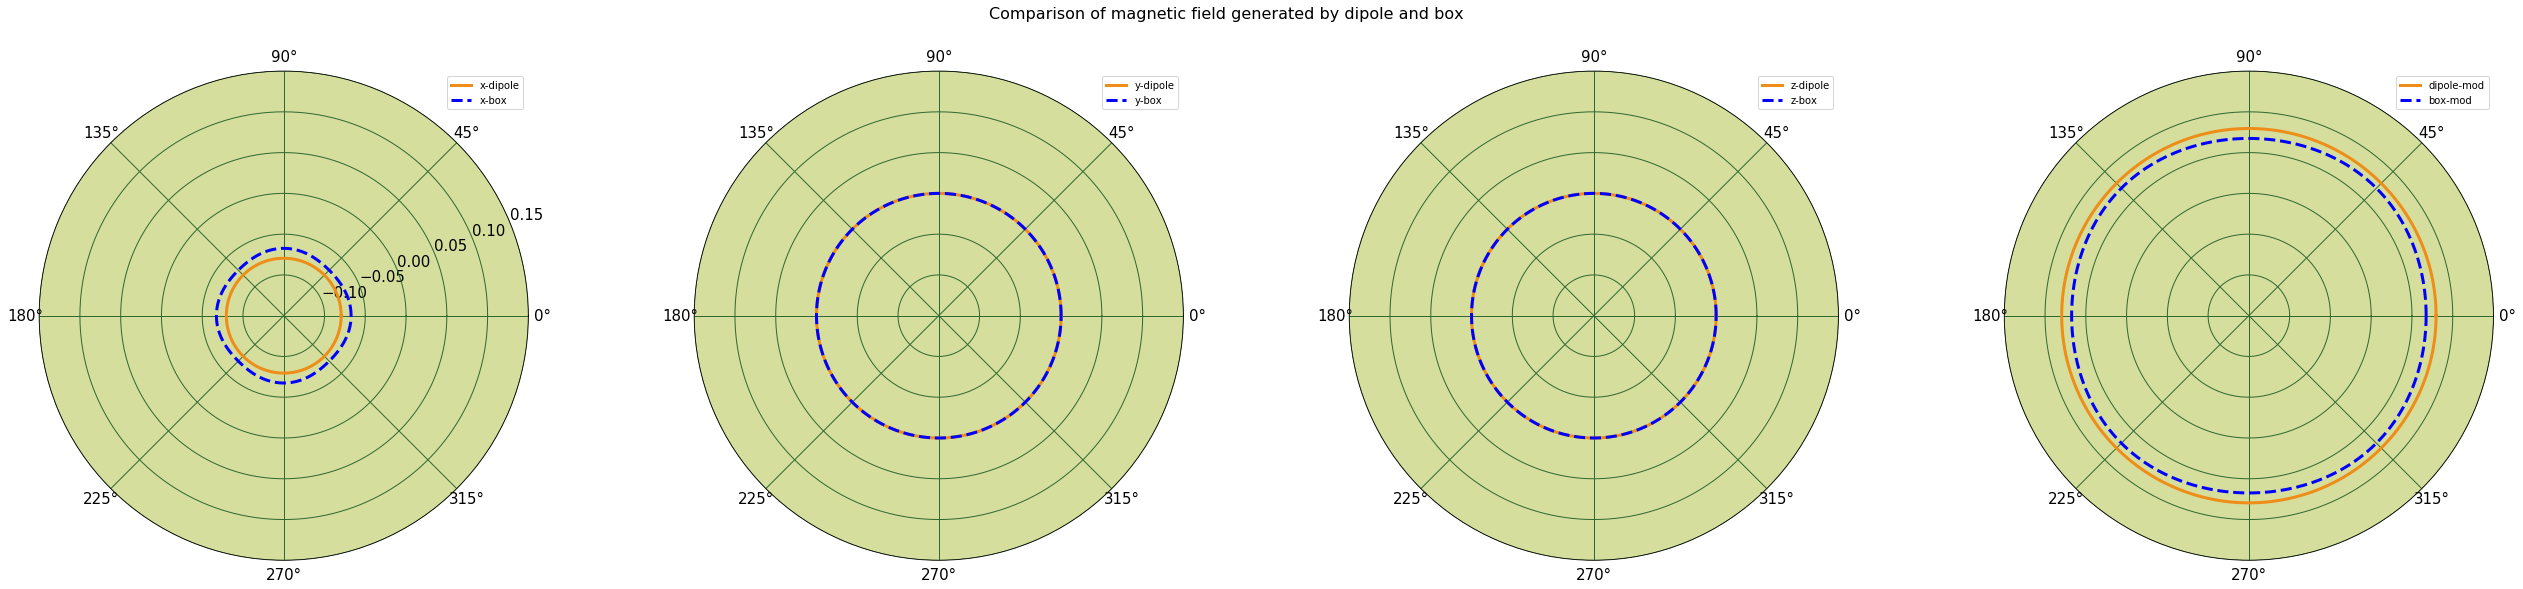

In [47]:
plt.clf()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(45,9), subplot_kw=dict(projection='polar', facecolor='#d5de9c'))

plt.suptitle("Comparison of magnetic field generated by dipole and box", size=16)

plt.ylim(-0.15,0.15)

ax1.plot(angles, [f[0] for f in d_field], color='#ee8d18', lw=3, label='x-dipole')
ax1.plot(angles, [f[0] for f in b_field], color='blue', ls='--', lw=3, label='x-box')
ax1.legend()

ax2.plot(angles, [f[1] for f in d_field], color='#ee8d18', lw=3, label='y-dipole')
ax2.plot(angles, [f[1] for f in b_field], color='blue', ls='--', lw=3, label='y-box')
ax2.legend()

ax3.plot(angles, [f[2] for f in d_field], color='#ee8d18', lw=3, label='z-dipole')
ax3.plot(angles, [f[2] for f in b_field], color='blue', ls='--', lw=3, label='z-box')
ax3.legend()

ax4.plot(angles, d_field_modulus, color='#ee8d18', lw=3, label='dipole-mod')
ax4.plot(angles, b_field_modulus, color='blue', ls='--', lw=3, label='box-mod')
ax4.legend()

plt.show()

We can see here that we've changed X by Z and so in this case the two components that are zero are the y and z components.

## Uniformly magnetized in Z but calculating fiend at plane x=-1

In [55]:
# position of the dipole
p = np.array([0.0, 0.0, 0.0], dtype=np.float64)

# starting observation point of the field
ro = np.array([1.0, 0.0, -1.0], dtype=np.float64)

# direction of the dipole
m = np.array([0.0, 0.0, 1.0], dtype=np.float64)

# rotation axis along Z direction
axis=np.array([0.0, 0.0, 1.0], dtype=np.float64)
#axis=np.array([1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0)], dtype=np.float64)

# angles from 0 to 2.0*pi
angles = np.linspace(0.0, 2.0*np.pi, 200)

# rotating the observation point
r = [RotationMatrix(angle, axis).dot(ro) for angle in angles]

In [56]:
# calculating field
d_field = [field_dipole(p, m, robs) for robs in r]
d_field_modulus = [np.sqrt(f.dot(f)) for f in d_field ]

# box field calculation, d is the width of the box in the 3 dims.
d = np.array([1.0, 1.0, 1.0], dtype=np.float64)
b_field = [field_rectangular_box(p, d,  m, robs) for robs in r]
b_field_modulus = [np.sqrt(f.dot(f)) for f in b_field ]

<Figure size 432x288 with 0 Axes>

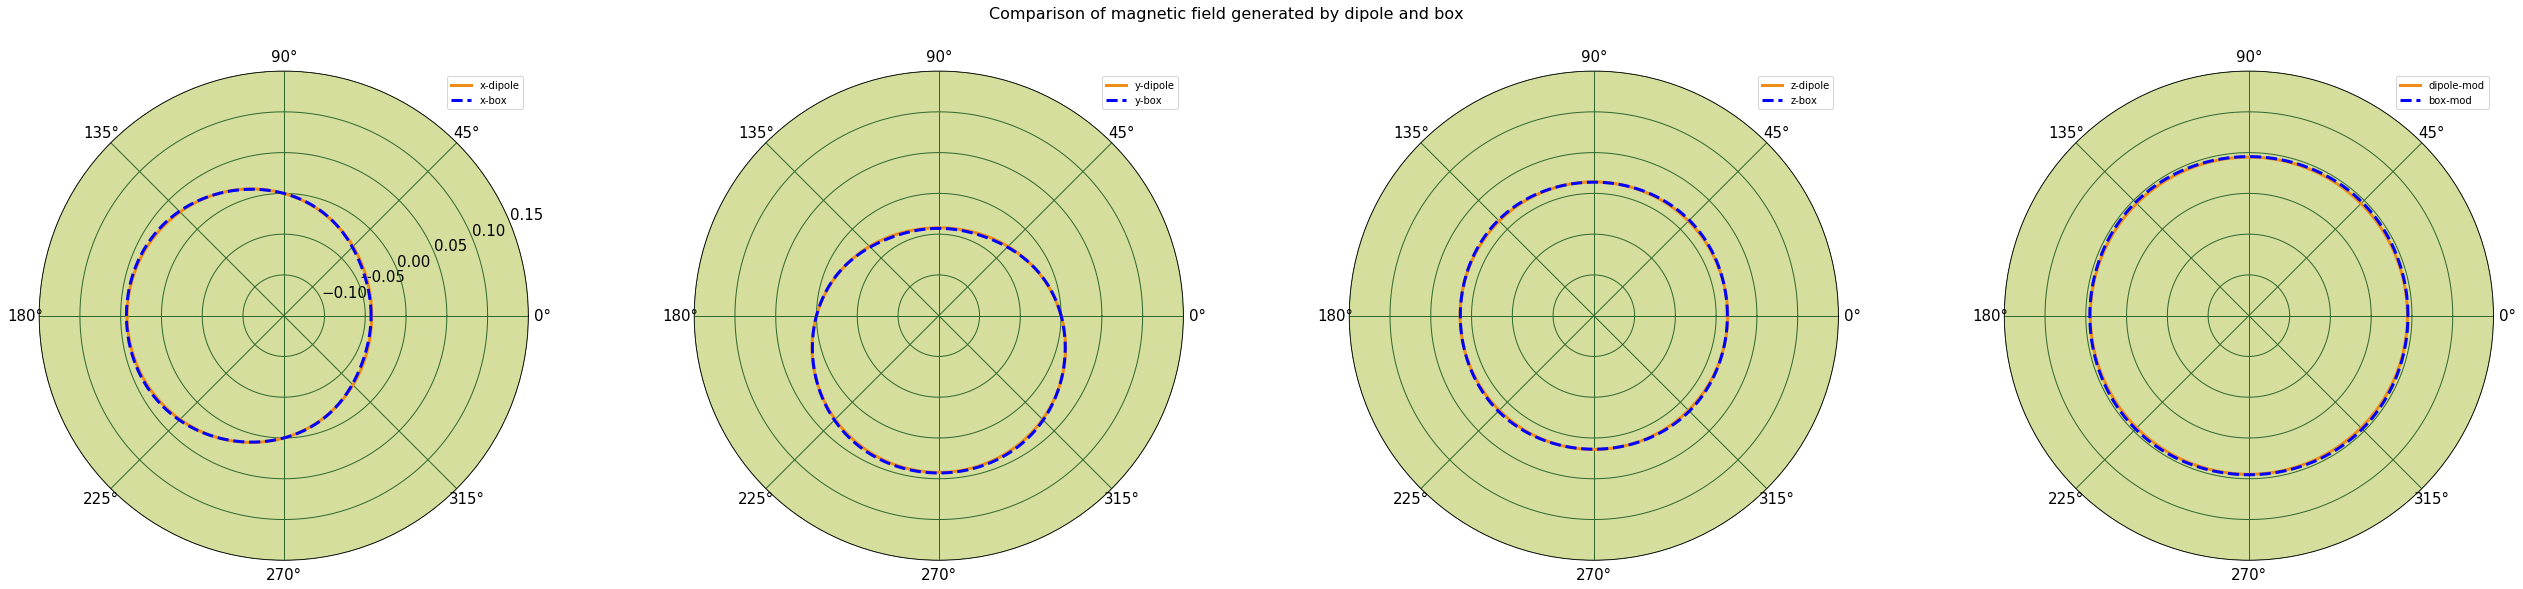

In [57]:
plt.clf()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(45,9), subplot_kw=dict(projection='polar', facecolor='#d5de9c'))

plt.suptitle("Comparison of magnetic field generated by dipole and box", size=16)

plt.ylim(-0.15,0.15)

ax1.plot(angles, [f[0] for f in d_field], color='#ee8d18', lw=3, label='x-dipole')
ax1.plot(angles, [f[0] for f in b_field], color='blue', ls='--', lw=3, label='x-box')
ax1.legend()

ax2.plot(angles, [f[1] for f in d_field], color='#ee8d18', lw=3, label='y-dipole')
ax2.plot(angles, [f[1] for f in b_field], color='blue', ls='--', lw=3, label='y-box')
ax2.legend()

ax3.plot(angles, [f[2] for f in d_field], color='#ee8d18', lw=3, label='z-dipole')
ax3.plot(angles, [f[2] for f in b_field], color='blue', ls='--', lw=3, label='z-box')
ax3.legend()

ax4.plot(angles, d_field_modulus, color='#ee8d18', lw=3, label='dipole-mod')
ax4.plot(angles, b_field_modulus, color='blue', ls='--', lw=3, label='box-mod')
ax4.legend()

plt.show()

Now the case is the same as the first point but we are no longer in the plane z=0. Here we start to see components of the x and y field as expected. Also recall that since we are calculating further away from the pole source, the field of the dipole is quite similar to the box.

## Uniformly magnetized in Z but different rotation axis (1, 1, 1)

In [58]:
# position of the dipole
p = np.array([0.0, 0.0, 0.0], dtype=np.float64)

# starting observation point of the field
ro = np.array([1.0, 0.0, 0.0], dtype=np.float64)

# direction of the dipole
m = np.array([0.0, 0.0, 1.0], dtype=np.float64)

# rotation axis along Z direction
axis=np.array([np.sqrt(1.0/3.0), np.sqrt(1.0/3.0), np.sqrt(1.0/3.0)], dtype=np.float64)
#axis=np.array([1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0)], dtype=np.float64)

# angles from 0 to 2.0*pi
angles = np.linspace(0.0, 2.0*np.pi, 200)

# rotating the observation point
r = [RotationMatrix(angle, axis).dot(ro) for angle in angles]

In [59]:
# calculating field
d_field = [field_dipole(p, m, robs) for robs in r]
d_field_modulus = [np.sqrt(f.dot(f)) for f in d_field ]

# box field calculation, d is the width of the box in the 3 dims.
d = np.array([1.0, 1.0, 1.0], dtype=np.float64)
b_field = [field_rectangular_box(p, d,  m, robs) for robs in r]
b_field_modulus = [np.sqrt(f.dot(f)) for f in b_field ]

<Figure size 432x288 with 0 Axes>

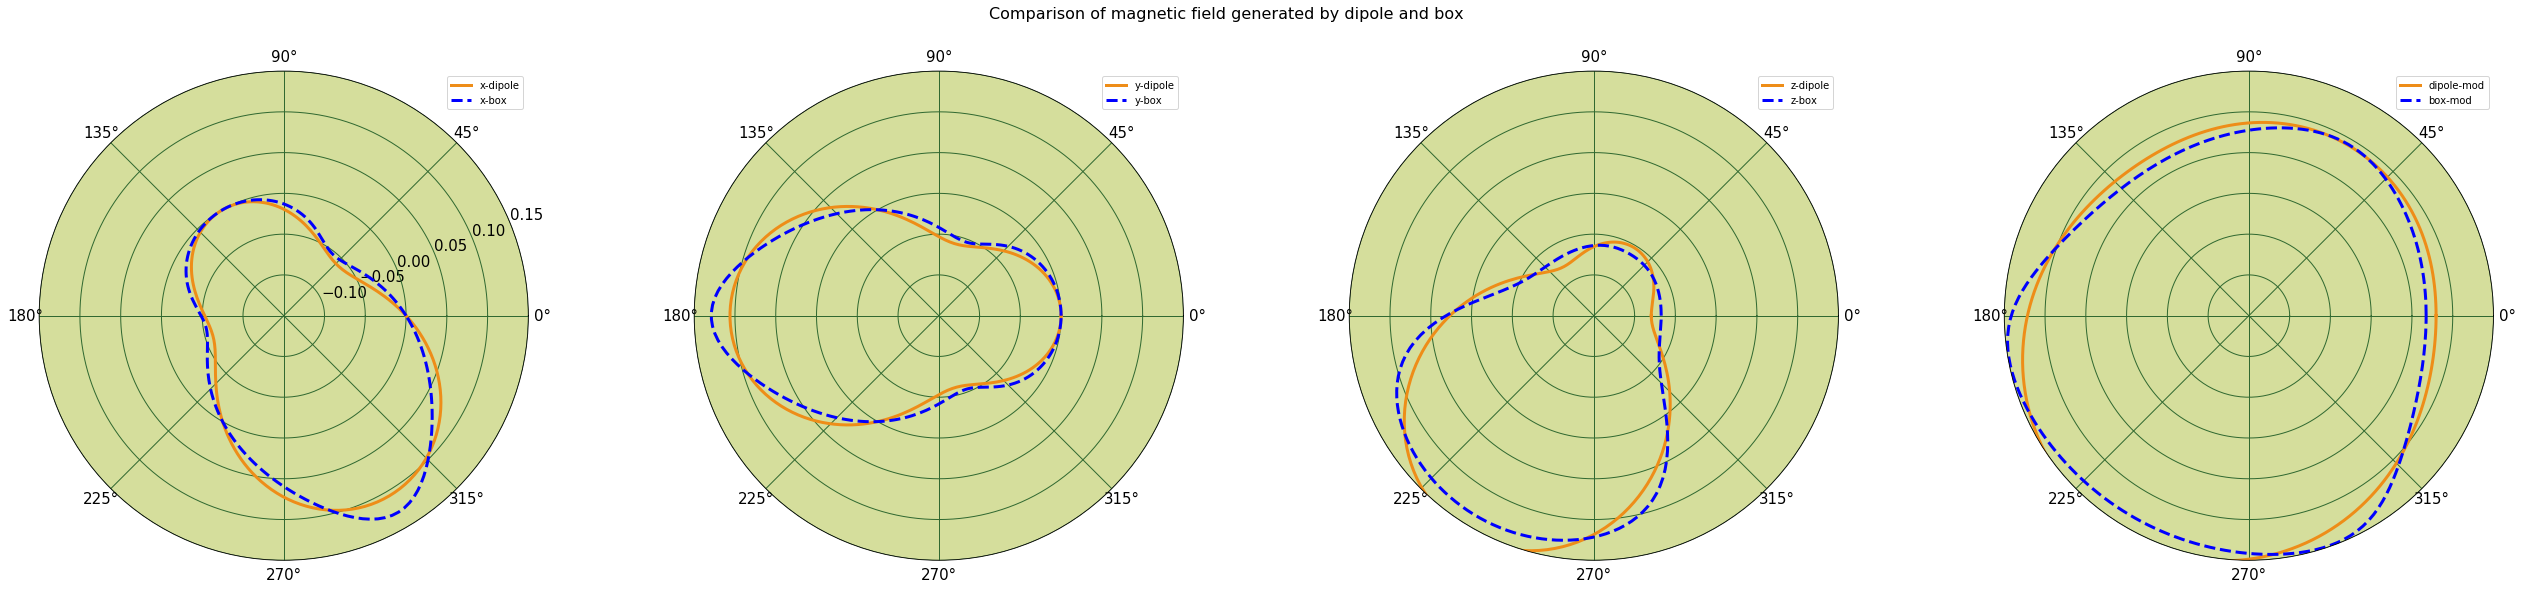

In [60]:
plt.clf()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(45,9), subplot_kw=dict(projection='polar', facecolor='#d5de9c'))

plt.suptitle("Comparison of magnetic field generated by dipole and box", size=16)

plt.ylim(-0.15,0.15)

ax1.plot(angles, [f[0] for f in d_field], color='#ee8d18', lw=3, label='x-dipole')
ax1.plot(angles, [f[0] for f in b_field], color='blue', ls='--', lw=3, label='x-box')
ax1.legend()

ax2.plot(angles, [f[1] for f in d_field], color='#ee8d18', lw=3, label='y-dipole')
ax2.plot(angles, [f[1] for f in b_field], color='blue', ls='--', lw=3, label='y-box')
ax2.legend()

ax3.plot(angles, [f[2] for f in d_field], color='#ee8d18', lw=3, label='z-dipole')
ax3.plot(angles, [f[2] for f in b_field], color='blue', ls='--', lw=3, label='z-box')
ax3.legend()

ax4.plot(angles, d_field_modulus, color='#ee8d18', lw=3, label='dipole-mod')
ax4.plot(angles, b_field_modulus, color='blue', ls='--', lw=3, label='box-mod')
ax4.legend()

plt.show()

## Uniformly magnetized in Z but changing origin of magnetic source

In [86]:
# position of the dipole
p = np.array([1.0, -1.0, 2.0], dtype=np.float64)

# starting observation point of the field
ro = np.array([1.7, -0.6, 0.83], dtype=np.float64)

# direction of the dipole
m = np.array([0.0, 0.0, 1.0], dtype=np.float64)

# rotation axis along Z direction
axis=np.array([np.sqrt(1.0/3.0), np.sqrt(1.0/3.0), np.sqrt(1.0/3.0)], dtype=np.float64)
#axis=np.array([1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0)], dtype=np.float64)

# angles from 0 to 2.0*pi
angles = np.linspace(0.0, 2.0*np.pi, 200)

# rotating the observation point
r = [RotationMatrix(angle, axis).dot(ro) for angle in angles]

In [87]:
# calculating field
d_field = [field_dipole(p, m, robs) for robs in r]
d_field_modulus = [np.sqrt(f.dot(f)) for f in d_field ]

# box field calculation, d is the width of the box in the 3 dims.
d = np.array([1.0, 1.0, 1.0], dtype=np.float64)
b_field = [field_rectangular_box(p, d,  m, robs) for robs in r]
b_field_modulus = [np.sqrt(f.dot(f)) for f in b_field ]

<Figure size 432x288 with 0 Axes>

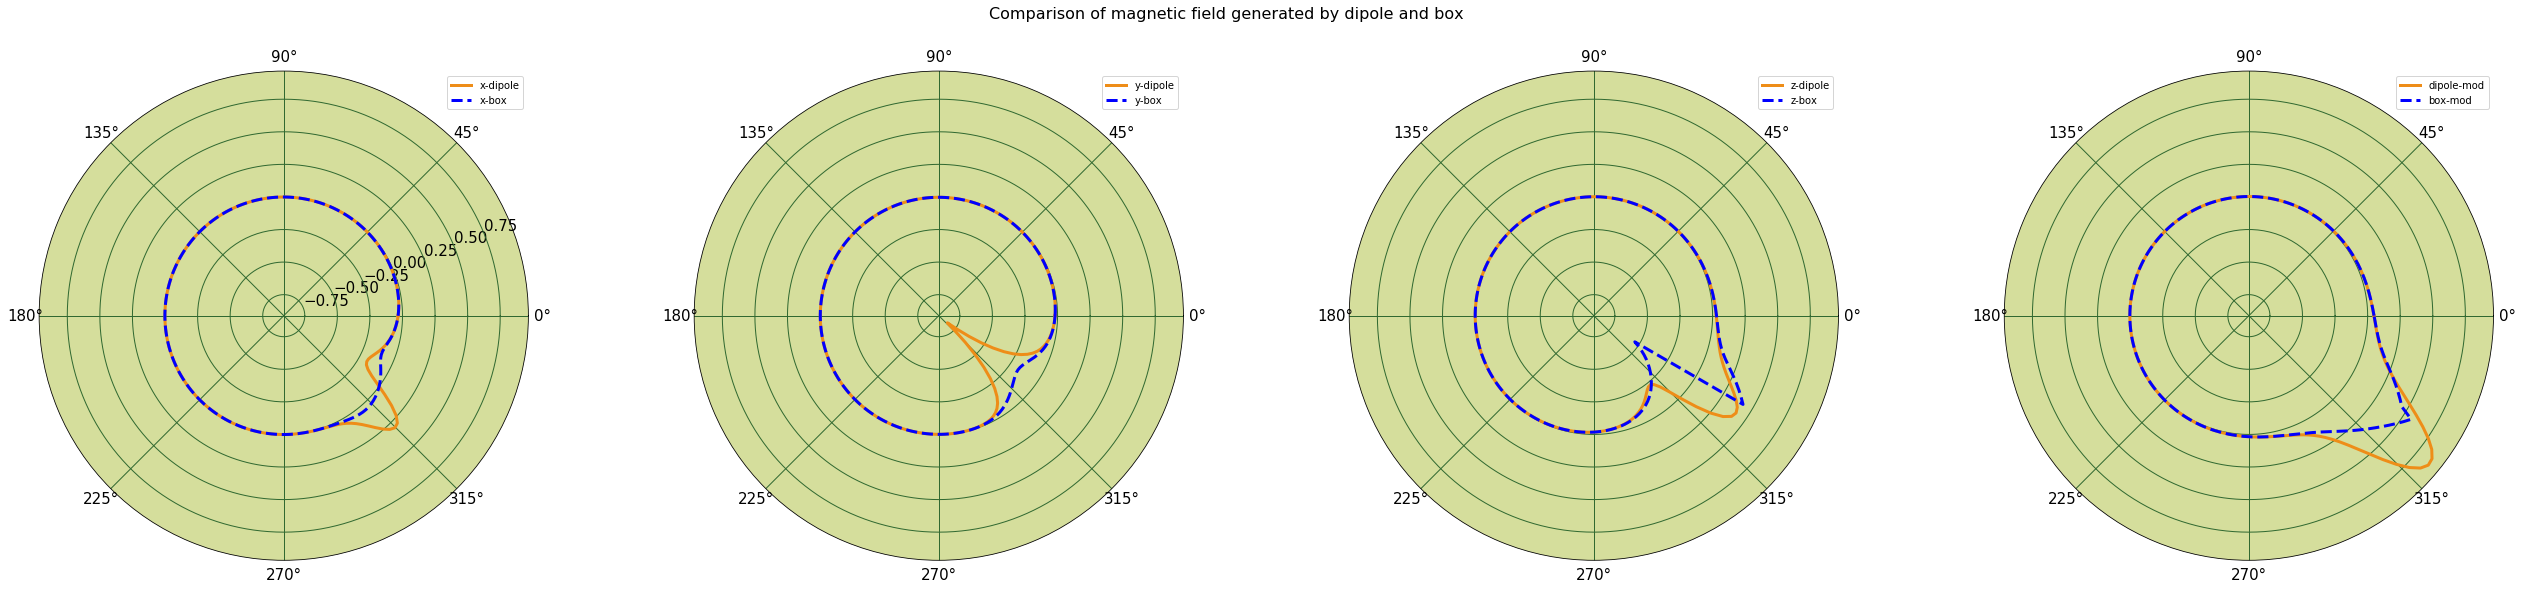

In [88]:
plt.clf()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(45,9), subplot_kw=dict(projection='polar', facecolor='#d5de9c'))

plt.suptitle("Comparison of magnetic field generated by dipole and box", size=16)

#plt.ylim(-0.15,0.15)

ax1.plot(angles, [f[0] for f in d_field], color='#ee8d18', lw=3, label='x-dipole')
ax1.plot(angles, [f[0] for f in b_field], color='blue', ls='--', lw=3, label='x-box')
ax1.legend()

ax2.plot(angles, [f[1] for f in d_field], color='#ee8d18', lw=3, label='y-dipole')
ax2.plot(angles, [f[1] for f in b_field], color='blue', ls='--', lw=3, label='y-box')
ax2.legend()

ax3.plot(angles, [f[2] for f in d_field], color='#ee8d18', lw=3, label='z-dipole')
ax3.plot(angles, [f[2] for f in b_field], color='blue', ls='--', lw=3, label='z-box')
ax3.legend()

ax4.plot(angles, d_field_modulus, color='#ee8d18', lw=3, label='dipole-mod')
ax4.plot(angles, b_field_modulus, color='blue', ls='--', lw=3, label='box-mod')
ax4.legend()

plt.show()

In [82]:
len(ro)

3

In [85]:
for i in range(len(r)):
    kk = r[i]-ro
    print(angles[i]*180/np.pi, np.sqrt(kk.dot(kk)))

0.0 0.0
1.8090452261306533 0.04244434847115355
3.6180904522613067 0.08487811892083576
5.427135678391959 0.12729073596383972
7.236180904522613 0.1696716294868312
9.045226130653267 0.21201023728264237
10.854271356783919 0.2542960076825948
12.663316582914574 0.29651840218619674
14.472361809045227 0.33866689808755895
16.28140703517588 0.3807309910978727
18.090452261306535 0.4227001979632995
19.899497487437184 0.464564059077617
21.708542713567837 0.5063121410889732
23.517587939698497 0.5479340395000952
25.326633165829147 0.589419381261309
27.135678391959797 0.6307578273557205
28.944723618090453 0.6719390753759158
30.753768844221106 0.7129528620915357
32.56281407035176 0.75378896600709
34.37185929648241 0.794437209909367
36.18090452261307 0.834887463403808
37.98994974874372 0.8751296454392161
39.79899497487437 0.9151537268201628
41.608040201005025 0.9549497327064761
43.417085427135675 0.9945077450991782
45.22613065326633 1.0338179053122594
47.035175879396995 1.07287041642967
48.8442211055276